## Introduction

This objective of this notebook is to give a brief overview of Python for scientific purposes. There main Python libraries will be introduced, namely **Numpy**, **Matplotlib** and **Pandas**.

The example we will be using will be based on the following simplified valve equation:

$Q = OP \times K \sqrt{\Delta P}$

where: 
> $OP$ = valve opening (in fraction)

> $K$ = valve conductance (kg.s$^{-1}$.bar$^{-0.5}$)

> $\Delta P$ = pressure drop (bar)

## Import Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Using Python as a calculator



We can use Python as a calculator to compute the valve equation. 



First let's assume $OP$, $K$, and $\sqrt{\Delta P}$:

In [2]:
op = 0.5 # fraction
k = 5000 # kg.s^-1.bar^-0.5
dp = 10 # bar

To calculate $Q$:

In [3]:
q = op * k * np.sqrt(dp)

We can print the value of $Q$:

In [4]:
print('The flow value is = '+ str(q) +' kg/s')

The flow value is = 7905.694150420949 kg/s


Here we use: 

1.   **cast** number to **string** (using `str`)
2.   **concatenate** multiple strings (`+` symbol)
3.   **print** statement to print **strings**



### Exercise

1. Round up the $Q$ value to 2 significant figures.

In [5]:
# your answer here

## Working with data arrays in Numpy
Create multiple pressure drop values using `np.linspace`:

In [6]:
dps = np.linspace(0, 100, 11)
dps

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

This is what we call a Numpy array.

We can use the array directly in the valve equation. 

In [7]:
qs = op * k * np.sqrt(dps)
qs

array([    0.        ,  7905.69415042, 11180.3398875 , 13693.06393763,
       15811.38830084, 17677.66952966, 19364.91673104, 20916.50066335,
       22360.679775  , 23717.08245126, 25000.        ])

### Exercise

1. Using `np.arange`, create an an array for dps with values from 0 to 200 with equal spaces of 25.

In [8]:
# your answer here

## Visualise data using Matplotlib

We can plot the result using `plt.plot`. For example to plot `qs` ($Q$) vs. `dps` ($\Delta P$):

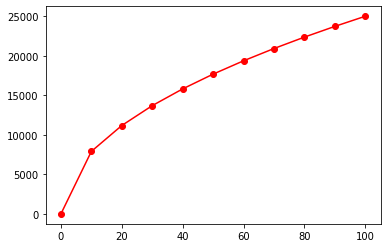

In [9]:
plt.plot(dps, qs, '-ro')

We save can the plot using `plt.savefig`:


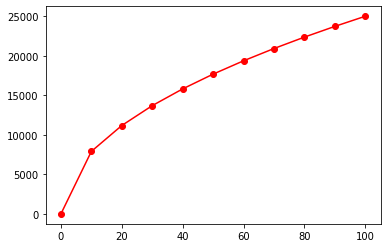

In [10]:
plt.plot(dps, qs, '-ro')
plt.savefig('my_plt.png')

### Exercise

1. Change the markers to triangles, and change the color of the plot to green.
2. Add labels on the x and y axes.

In [11]:
# your answer here

## Reuse codes using **function**


What if we want to calculately q multiple time? for example, if we have two sets of $OP$ and $\Delta P$:


In [12]:
op1, dp1 = 0.1, 10
op2, dp2 = 0.5, 20

The easiest solution to find $Q$ for the two sets of data above is by repeating the calculation:

In [13]:
q1 = op1 * k * np.sqrt(dp1)
q2 = op2 * k * np.sqrt(dp2)
print(q1, q2)

1581.1388300841897 11180.339887498949


But what if we have a thousand sets of $OP$ and $\Delta P$? Repeating the codes is probably not very efficient.


We can organise related codes that can be called whenever needed by using a **function**:

In [14]:
def valve_flow(dp, op, k):
    
    print('Starting flow calculation for dp='+ str(dp), ', op='+ str(op)+', k='+str(k))
    q = op * k * np.sqrt(dp)
    print('Calculation finished')
    
    return q

Once defined, the function can be called to perform the computations: 

In [15]:
q1 = valve_flow(dp1, op1, k)
print(q1)

Starting flow calculation for dp=10 , op=0.1, k=5000
Calculation finished
1581.1388300841897


### Exercise
1. Write a function called `squared` that receives a variable `x` and returns the squared value of `x` (called `x_squared`).

In [16]:
# your answer here

## Perform repetitive operations using `for` loops

What if we want to similar operation for muiltple times? For example, we might want to calculate $Q$ for $OP$ = 0.3, 0.6, 0.9 and plot $Q$ vs. $OP$ everytime we perform the claculation. This can be done using `for` loop:

Starting flow calculation for dp=10 , op=0.3, k=5000
Calculation finished
Starting flow calculation for dp=10 , op=0.6, k=5000
Calculation finished
Starting flow calculation for dp=10 , op=0.9, k=5000
Calculation finished


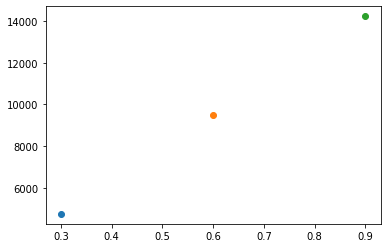

In [17]:
for op in [0.3, 0.6, 0.9]:
  
  q = valve_flow(dp, op, k)

  plt.scatter(op, q)


### Exercise
1. Create arrays of $OP$, $\Delta P$, and $K$ as shown below. Then create a nested loop to calculate all the possible combinations of $OP$, $\Delta P$, and $K$.

`openings = np.linspace(0, 1, 5)`

`dps = np.linspace(0, 200, 5)`

`ks = np.linspace(0, 100000, 5)`


In [18]:
# your answer here

## Working with tabular data in Pandas

How to create a empty table?

We can use a Pandas **DataFrame**:

In [19]:
data = pd.DataFrame(columns=['k', 'op', 'dp', 'q'])
data

,k,op,dp,q


Let's first redefine the values for $OP$, $\Delta P$ and $K$:

In [20]:
openings = np.linspace(0, 1, 5)
dps = np.linspace(0, 200, 5)
ks = np.linspace(0, 100000, 5)

We can perform a nested loop to calculate $Q$ for all the possible combinations of $OP$, $\Delta P$ and $K$, and store the data in the DataFrame.

In [21]:
for op in openings:
    for dp in dps:
        for k in ks:
            q = valve_flow(dp, op, k)
            #print(op, dp, k, q)
            
            data.loc[len(data)] = [k, op, dp, q]

Starting flow calculation for dp=0.0 , op=0.0, k=0.0
Calculation finished
Starting flow calculation for dp=0.0 , op=0.0, k=25000.0
Calculation finished
Starting flow calculation for dp=0.0 , op=0.0, k=50000.0
Calculation finished
Starting flow calculation for dp=0.0 , op=0.0, k=75000.0
Calculation finished
Starting flow calculation for dp=0.0 , op=0.0, k=100000.0
Calculation finished
Starting flow calculation for dp=50.0 , op=0.0, k=0.0
Calculation finished
Starting flow calculation for dp=50.0 , op=0.0, k=25000.0
Calculation finished
Starting flow calculation for dp=50.0 , op=0.0, k=50000.0
Calculation finished
Starting flow calculation for dp=50.0 , op=0.0, k=75000.0
Calculation finished
Starting flow calculation for dp=50.0 , op=0.0, k=100000.0
Calculation finished
Starting flow calculation for dp=100.0 , op=0.0, k=0.0
Calculation finished
Starting flow calculation for dp=100.0 , op=0.0, k=25000.0
Calculation finished
Starting flow calculation for dp=100.0 , op=0.0, k=50000.0
Calcul

In [22]:
data

,k,op,dp,q
0,0.0,0.0,0.0,0.000000e+00
1,25000.0,0.0,0.0,0.000000e+00
2,50000.0,0.0,0.0,0.000000e+00
3,75000.0,0.0,0.0,0.000000e+00
4,100000.0,0.0,0.0,0.000000e+00
...,...,...,...,...
120,0.0,1.0,200.0,0.000000e+00
121,25000.0,1.0,200.0,3.535534e+05
122,50000.0,1.0,200.0,7.071068e+05
123,75000.0,1.0,200.0,1.060660e+06


### Exercise

1. Using `.to_csv` method, export the DataFrame to a comma-separated values file (csv) called `my_data.csv`. Once you have done this, check if the csv file is saved in your working folder.

In [23]:
# your answer here